In [850]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, explained_variance_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression

linreg = LinearRegression()
sb.set() # set the default Seaborn style for graphics

In [851]:
#get values of cpi
cpi = pd.read_csv('Datasets/Groceries_clean.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#set data series as index and convert to date time
cpi = cpi.rename(columns = {'Data Series':'Date'})
cpi.set_index('Date',inplace=True)
cpi = cpi.rename(columns=lambda x: x.strip())
#cpi.columns = pd.to_datetime(cpi.columns, format='%Y %b').dt.strftime('%Y-%m')
cpi.columns = pd.DatetimeIndex(cpi.columns).to_period('M')


cpi = cpi.T
cpi = cpi.rename(columns=lambda x: x.strip())
#cpi = cpi.sort_index()
cpi = cpi.reindex()
cpi.head()
#print(cpi.index.name)

Date,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Meat,Fish & Seafood,"Milk, Cheese & Eggs",Oils & Fats,Fruits,Vegetables,"Sugar, Preserves & Confectionery",Non-Alcoholic Beverages,Other Food,Food Serving Services,Restaurant Food,Fast Food,Hawker Food,Catered Food,Clothing & Footwear,Clothing,Other Articles & Related Services,Footwear,Housing & Utilities,Accommodation,Utilities & Other Fuels,Household Durables & Services,Household Durables,Household Services & Supplies,Health Care,Medicines & Health Products,Outpatient Services,Hospital Services,Health Insurance,Transport,Private Transport,Public Transport,Other Transport Services,Communication,Postage & Courier Services,Telecommunication Equipment,Telecommunication Services,Recreation & Culture,Recreational & Cultural Goods,Recreational & Cultural Services,"Newspapers, Books & Stationery",Holiday Expenses,Education,Tuition & Other Fees,Textbooks & Guides,Miscellaneous Goods & Services,Personal Care,Alcoholic Drinks & Tobacco,Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-Occupied Accommodation,All Items Less Accommodation
2023-01,111.567,113.491,114.165,111.304,123.126,108.068,113.866,111.548,110.453,120.306,111.269,112.775,111.027,113.049,113.477,112.832,113.121,111.847,95.953,95.842,106.098,95.84,109.444,109.348,111.139,105.545,106.759,104.731,104.348,100.322,103.248,106.343,109.131,129.642,134.513,117.171,110.907,100.088,96.681,98.073,100.182,106.234,102.075,107.411,102.982,107.686,104.908,104.829,102.13,100.288,102.815,102.17,97.448,93.758,95.481,111.936,112.211
2022-12,111.0,112.379,113.787,110.517,123.375,106.945,113.059,111.691,111.091,118.743,112.507,114.243,109.71,111.536,111.103,110.385,112.389,109.034,94.08,94.369,103.546,92.534,108.629,108.205,111.194,104.471,105.279,103.929,103.22,101.254,100.897,105.668,108.329,130.402,135.911,115.447,113.21,99.034,95.579,95.969,99.302,107.062,100.946,106.027,102.265,109.098,103.784,103.895,101.792,99.531,101.528,100.68,97.728,95.045,95.181,111.422,111.79
2022-11,110.773,111.853,113.031,109.772,123.009,106.489,112.246,113.379,109.84,117.076,113.762,113.481,109.45,111.251,110.894,110.385,111.862,109.034,93.818,93.864,102.714,93.943,108.368,107.935,111.007,104.769,105.949,103.977,102.875,101.159,100.756,105.161,108.329,131.168,137.755,114.383,114.664,99.094,96.399,99.243,99.14,105.775,101.532,106.023,102.297,106.914,103.357,103.503,101.792,99.713,101.334,100.598,97.916,95.045,95.143,111.206,111.575
2022-10,110.223,111.301,112.562,108.941,122.139,107.107,110.624,115.08,110.828,116.334,113.063,112.607,107.42,110.709,110.055,110.385,111.287,109.034,94.508,94.086,102.626,94.376,108.348,108.186,110.771,104.649,105.94,103.782,102.857,100.858,101.588,104.873,107.134,128.421,133.947,114.544,115.407,99.382,99.68,99.956,99.267,105.481,101.955,106.236,102.263,106.184,103.219,103.343,101.792,99.034,100.793,100.71,97.359,95.045,93.936,110.5,110.791
2022-09,110.154,110.794,112.105,107.746,120.77,107.281,110.656,114.309,111.132,117.139,113.12,111.977,107.181,110.26,109.46,108.605,110.857,109.113,95.346,95.028,101.805,94.922,107.82,107.24,111.58,104.544,106.015,103.557,102.781,101.183,101.369,105.09,106.982,129.304,135.717,114.083,114.528,99.235,99.68,99.755,99.239,105.527,101.094,106.376,101.642,106.743,103.174,103.24,100.953,99.055,101.231,100.454,96.867,94.602,93.936,110.618,110.976


Date,Food,Food Excl Food Serving Services,Bread & Cereals,Meat,Fish & Seafood,"Milk, Cheese & Eggs",Oils & Fats,Fruits,Vegetables,"Sugar, Preserves & Confectionery",Non-Alcoholic Beverages,Other Food
2023-01,113.491,114.165,111.304,123.126,108.068,113.866,111.548,110.453,120.306,111.269,112.775,111.027
2022-12,112.379,113.787,110.517,123.375,106.945,113.059,111.691,111.091,118.743,112.507,114.243,109.710
2022-11,111.853,113.031,109.772,123.009,106.489,112.246,113.379,109.840,117.076,113.762,113.481,109.450
2022-10,111.301,112.562,108.941,122.139,107.107,110.624,115.080,110.828,116.334,113.063,112.607,107.420
2022-09,110.794,112.105,107.746,120.770,107.281,110.656,114.309,111.132,117.139,113.120,111.977,107.181


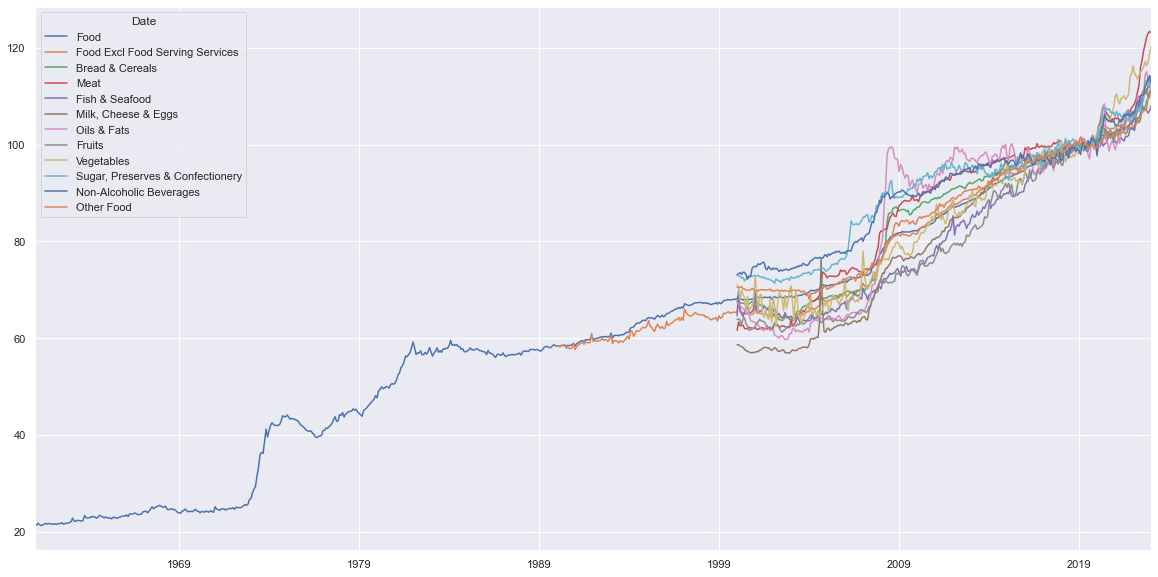

In [852]:
grocery = cpi[['Food','Food Excl Food Serving Services','Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables','Sugar, Preserves & Confectionery','Non-Alcoholic Beverages','Other Food']].replace('na', np.nan)
grocery = grocery.apply(pd.to_numeric)
grocery.plot(figsize=(20, 10))
grocery.head()

# Extrapolate values, if correlation is strong

In [853]:
def univariateLinearRegression(df, yvars):

    # Extract Predictor
    X = pd.DataFrame(df['Food'])

    for yvar in yvars:
        # Extract Response
        y = pd.DataFrame(df[yvar])

        # Drop missing values from X and y
        data = pd.concat([X, y], axis=1).dropna()

        # Split the Dataset into random Train and Test (80:20)
        X_train, X_test, y_train, y_test = train_test_split(data[X.columns], data[y.columns], test_size=0.2, random_state=42)

        linreg = LinearRegression()         # create the linear regression object
        linreg.fit(X_train, y_train)        # train the linear regression model

        # Print the coefficients of the Regression Line
        print(f"\n{'-'*20}\nPredicting {yvar} using 'Food'")
        print('Intercept \t: b = ', linreg.intercept_)
        print('Coefficients \t: a = ', linreg.coef_)

        # Formula for the Regression line
        regline_x = X_train
        regline_y = linreg.intercept_ + linreg.coef_ * X_train

        # Predict Response corresponding to Predictors
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)

        # Plot the Predictions vs the True values
        f, axes = plt.subplots(1, 2, figsize=(10, 6))
        axes[0].scatter(X_train, y_train, color="blue")
        axes[0].plot(regline_x, regline_y, 'r-', linewidth=3)
        axes[0].set_title(f"Regression Line on Train Set ({yvar})")
        axes[1].scatter(X_test, y_test, color="green")
        axes[1].scatter(X_test, y_test_pred, color="red")
        axes[1].set_title(f"Model Prediction on Test Set ({yvar})")
        plt.show()

        # Check the Goodness of Fit (on Train Data)
        print(f"Goodness of Fit of Model \tTrain Dataset ({yvar})")
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
        print()

        # Check the Goodness of Fit (on Test Data)
        print(f"Prediction Accuracy of Model \tTest Dataset ({yvar})")
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
        print()


--------------------
Predicting Food Excl Food Serving Services using 'Food'
Intercept 	: b =  [-7.58325054]
Coefficients 	: a =  [[1.08301364]]


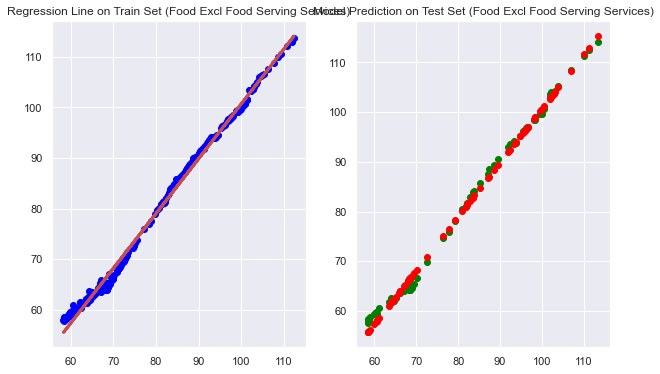

Goodness of Fit of Model 	Train Dataset (Food Excl Food Serving Services)
Explained Variance (R^2) 	: 0.994197716576356
Mean Squared Error (MSE) 	: 1.4388521286025064

Prediction Accuracy of Model 	Test Dataset (Food Excl Food Serving Services)
Mean Squared Error (MSE) 	: 1.3439890222288113


--------------------
Predicting Bread & Cereals using 'Food'
Intercept 	: b =  [-5.60492704]
Coefficients 	: a =  [[1.06832031]]


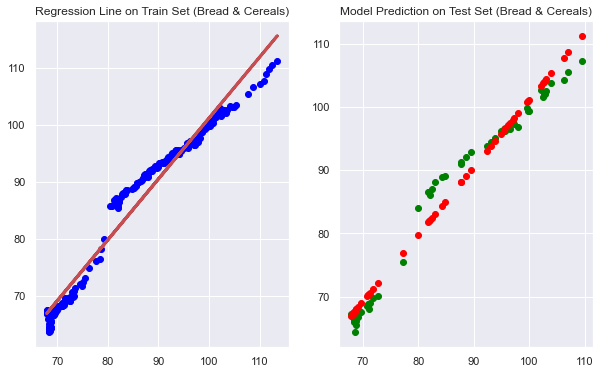

Goodness of Fit of Model 	Train Dataset (Bread & Cereals)
Explained Variance (R^2) 	: 0.9640004106618355
Mean Squared Error (MSE) 	: 7.046744920046093

Prediction Accuracy of Model 	Test Dataset (Bread & Cereals)
Mean Squared Error (MSE) 	: 5.880161447972663


--------------------
Predicting Meat using 'Food'
Intercept 	: b =  [-14.6503218]
Coefficients 	: a =  [[1.19719938]]


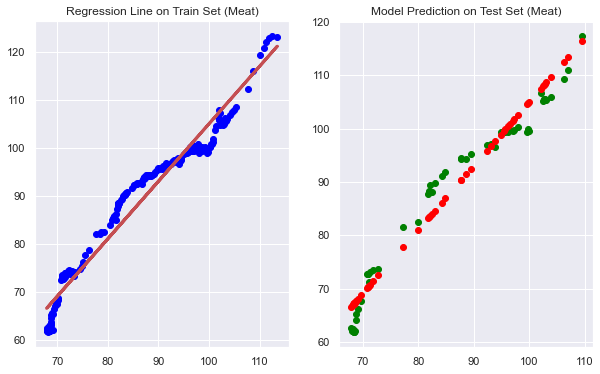

Goodness of Fit of Model 	Train Dataset (Meat)
Explained Variance (R^2) 	: 0.9537489609735368
Mean Squared Error (MSE) 	: 11.491735940952767

Prediction Accuracy of Model 	Test Dataset (Meat)
Mean Squared Error (MSE) 	: 12.17133805065657


--------------------
Predicting Fish & Seafood using 'Food'
Intercept 	: b =  [-11.14374648]
Coefficients 	: a =  [[1.08732202]]


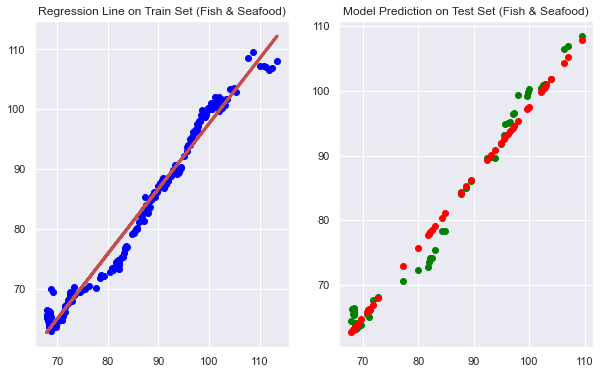

Goodness of Fit of Model 	Train Dataset (Fish & Seafood)
Explained Variance (R^2) 	: 0.9787219798188412
Mean Squared Error (MSE) 	: 4.2496533176177405

Prediction Accuracy of Model 	Test Dataset (Fish & Seafood)
Mean Squared Error (MSE) 	: 4.258569158010437


--------------------
Predicting Milk, Cheese & Eggs using 'Food'
Intercept 	: b =  [-33.06605717]
Coefficients 	: a =  [[1.34248259]]


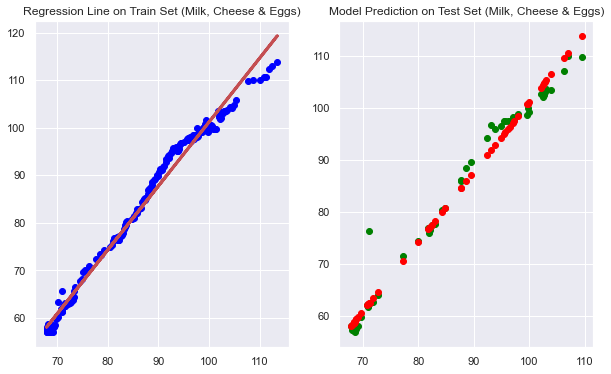

Goodness of Fit of Model 	Train Dataset (Milk, Cheese & Eggs)
Explained Variance (R^2) 	: 0.9888739568728546
Mean Squared Error (MSE) 	: 3.3526049456975744

Prediction Accuracy of Model 	Test Dataset (Milk, Cheese & Eggs)
Mean Squared Error (MSE) 	: 6.342759106264902


--------------------
Predicting Oils & Fats using 'Food'
Intercept 	: b =  [-16.75338036]
Coefficients 	: a =  [[1.20907751]]


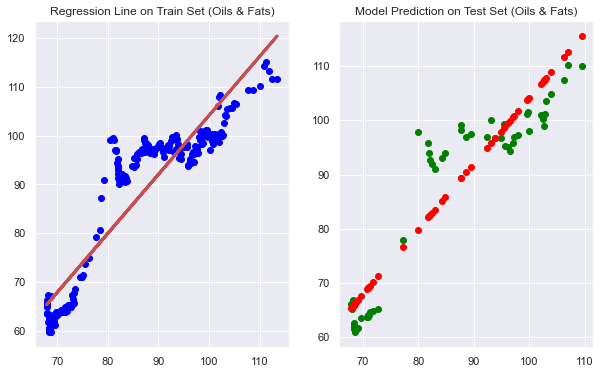

Goodness of Fit of Model 	Train Dataset (Oils & Fats)
Explained Variance (R^2) 	: 0.8567513303506601
Mean Squared Error (MSE) 	: 40.411907483519585

Prediction Accuracy of Model 	Test Dataset (Oils & Fats)
Mean Squared Error (MSE) 	: 38.200772470369664


--------------------
Predicting Fruits using 'Food'
Intercept 	: b =  [-20.64924455]
Coefficients 	: a =  [[1.18779528]]


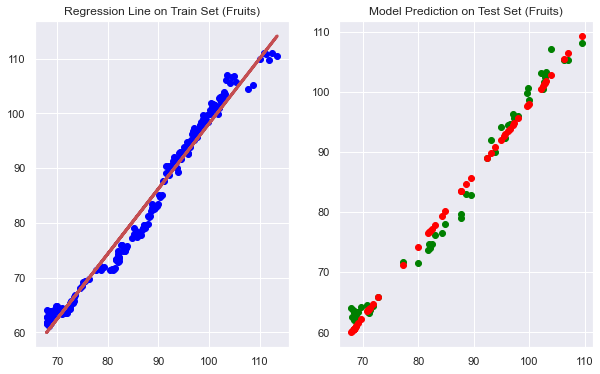

Goodness of Fit of Model 	Train Dataset (Fruits)
Explained Variance (R^2) 	: 0.9802504195476145
Mean Squared Error (MSE) 	: 4.699690824828812

Prediction Accuracy of Model 	Test Dataset (Fruits)
Mean Squared Error (MSE) 	: 4.252349643029123


--------------------
Predicting Vegetables using 'Food'
Intercept 	: b =  [-14.0536906]
Coefficients 	: a =  [[1.16019697]]


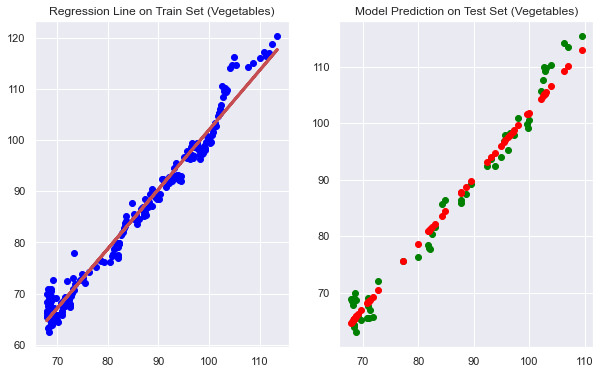

Goodness of Fit of Model 	Train Dataset (Vegetables)
Explained Variance (R^2) 	: 0.9757313932008662
Mean Squared Error (MSE) 	: 5.5353269829972085

Prediction Accuracy of Model 	Test Dataset (Vegetables)
Mean Squared Error (MSE) 	: 5.995612843380733


--------------------
Predicting Sugar, Preserves & Confectionery using 'Food'
Intercept 	: b =  [16.69366072]
Coefficients 	: a =  [[0.86192485]]


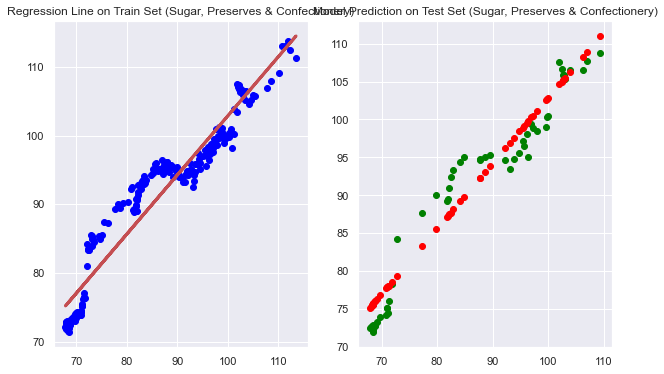

Goodness of Fit of Model 	Train Dataset (Sugar, Preserves & Confectionery)
Explained Variance (R^2) 	: 0.9228583392560978
Mean Squared Error (MSE) 	: 10.267341375450838

Prediction Accuracy of Model 	Test Dataset (Sugar, Preserves & Confectionery)
Mean Squared Error (MSE) 	: 8.759692996959863


--------------------
Predicting Non-Alcoholic Beverages using 'Food'
Intercept 	: b =  [19.36765051]
Coefficients 	: a =  [[0.82912572]]


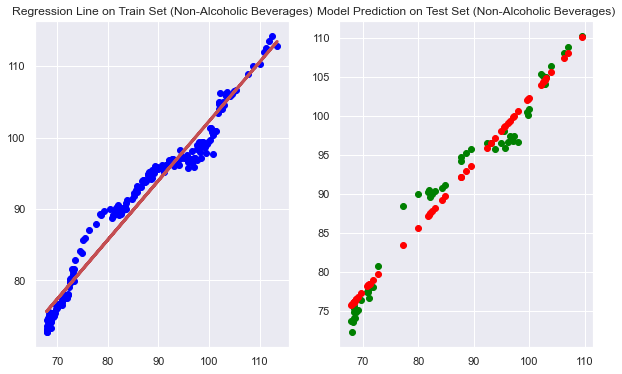

Goodness of Fit of Model 	Train Dataset (Non-Alcoholic Beverages)
Explained Variance (R^2) 	: 0.9646108874866716
Mean Squared Error (MSE) 	: 4.169879921480454

Prediction Accuracy of Model 	Test Dataset (Non-Alcoholic Beverages)
Mean Squared Error (MSE) 	: 3.9117712047783315


--------------------
Predicting Other Food using 'Food'
Intercept 	: b =  [3.49251077]
Coefficients 	: a =  [[0.96727806]]


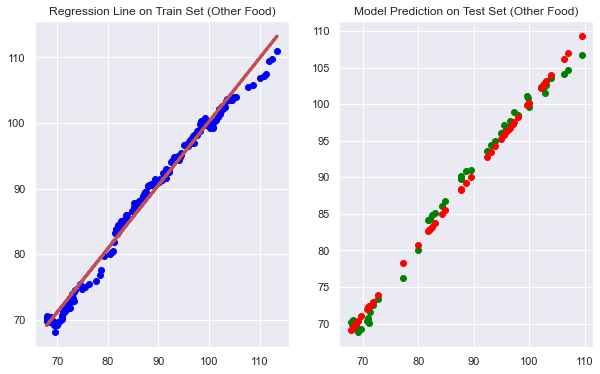

Goodness of Fit of Model 	Train Dataset (Other Food)
Explained Variance (R^2) 	: 0.9912509638317059
Mean Squared Error (MSE) 	: 1.3653516578245066

Prediction Accuracy of Model 	Test Dataset (Other Food)
Mean Squared Error (MSE) 	: 1.4206883910091979



In [854]:
univariateLinearRegression(grocery, ['Food Excl Food Serving Services','Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables','Sugar, Preserves & Confectionery','Non-Alcoholic Beverages','Other Food'])

# Extrapolate

In [855]:
grocery = grocery.fillna(0)
columns_to_impute = ['Food Excl Food Serving Services','Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables','Sugar, Preserves & Confectionery','Non-Alcoholic Beverages','Other Food']

for col in columns_to_impute:
    df = grocery[['Food', col]]
    df = df.fillna(0)

    # split the dataset into two parts
    missing = df[df[col] == 0]
    present = df[df[col] != 0]

    # fit a linear regression model
    lr = LinearRegression()
    lr.fit(present[['Food']], present[col])

    # impute the missing values
    missing[col] = lr.predict(missing[['Food']])

    # add random noise to the imputed values with 50% probability
    add_noise = np.random.choice([True, False], size=len(missing), p=[0.2, 0.8])
    missing[col][add_noise] += np.random.normal(loc=0, scale=0.05*present[col].std(), size=len(missing))[add_noise]

    # combine the two parts of the dataset back together
    df_imputed = pd.concat([present, missing])

    # replace the values in the original dataset
    grocery.loc[df[col] == 0, col] = df_imputed.loc[df[col] == 0, col]

<ipython-input-855-e8f26594bcf3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[col] = lr.predict(missing[['Food']])
C:\Users\josep\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\josep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Date,Food,Food Excl Food Serving Services,Bread & Cereals,Meat,Fish & Seafood,"Milk, Cheese & Eggs",Oils & Fats,Fruits,Vegetables,"Sugar, Preserves & Confectionery",Non-Alcoholic Beverages,Other Food
1961-05,21.253,15.300534,16.804940,10.769094,11.381469,-4.310766,9.205112,4.987516,8.822433,34.433116,36.785889,23.506268
1961-04,21.432,15.751502,16.703186,10.983134,11.970984,-4.071050,9.420396,5.199227,10.284529,34.588632,36.934747,24.192408
1961-03,21.743,16.087761,17.800825,11.355014,12.556496,-3.654559,9.794436,6.797799,10.648097,34.858830,37.193378,24.493442
1961-02,21.314,15.623918,17.343913,10.565370,11.842253,-4.229075,9.278477,5.059663,10.146584,34.486113,36.836617,22.825382
1961-01,21.412,15.729877,17.448290,10.959219,11.949165,-4.097834,9.396342,5.175572,10.199033,34.928068,36.918115,24.173049


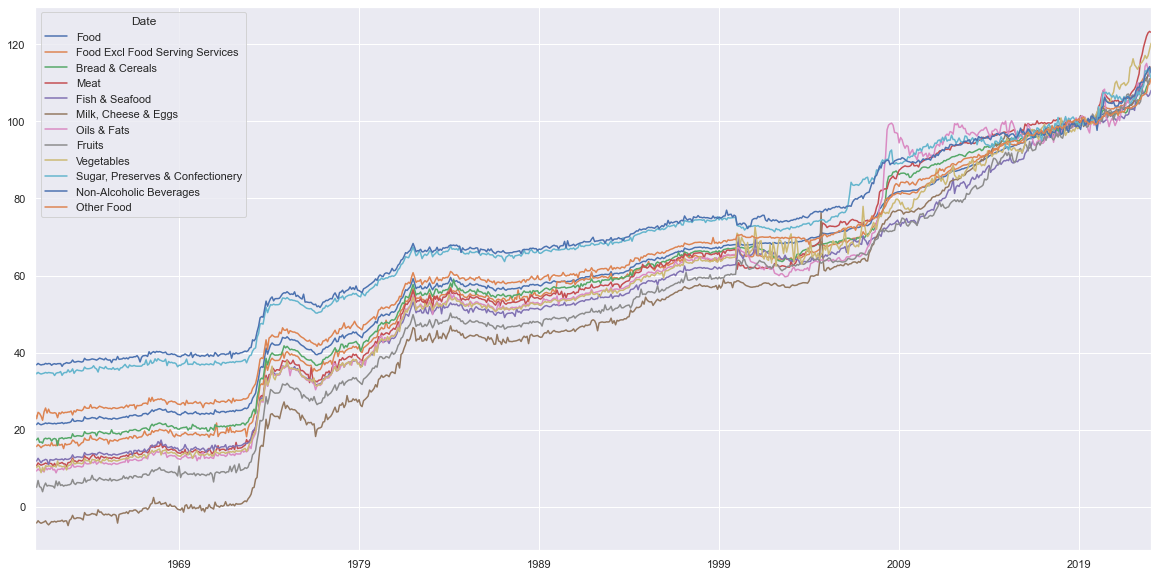

In [856]:
grocery.plot(figsize=(20, 10))
#grocery.head()
# grocery = grocery.dropna()
grocery.tail()
# grocery.count()

In [857]:
births = pd.read_csv('Datasets/Birth_Rate_clean.csv')

births = births.rename(columns = {'Data Series':'Date'})
births.set_index('Date',inplace=True)
births = births.rename(columns=lambda x: x.strip())
#births.columns = pd.to_datetime(births.columns, format='%Y %b')
births.columns = pd.DatetimeIndex(births.columns).to_period('M')

births = births.T
births = births.rename(columns=lambda x: x.strip())
births = births.sort_index()
births.head()
births.info()
#print(births.keys())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 756 entries, 1960-01 to 2022-12
Freq: M
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Total Live-Births By Ethnic Group         756 non-null    int64
 1   Malays                                    756 non-null    int64
 2   Chinese                                   756 non-null    int64
 3   Indians                                   756 non-null    int64
 4   Other Ethnic Groups                       756 non-null    int64
 5   Total Male Live-Births By Ethnic Group    756 non-null    int64
 6   Malays                                    756 non-null    int64
 7   Chinese                                   756 non-null    int64
 8   Indians                                   756 non-null    int64
 9   Other Ethnic Groups                       756 non-null    int64
 10  Total Female Live-Births By Ethnic Group  7

<AxesSubplot:>

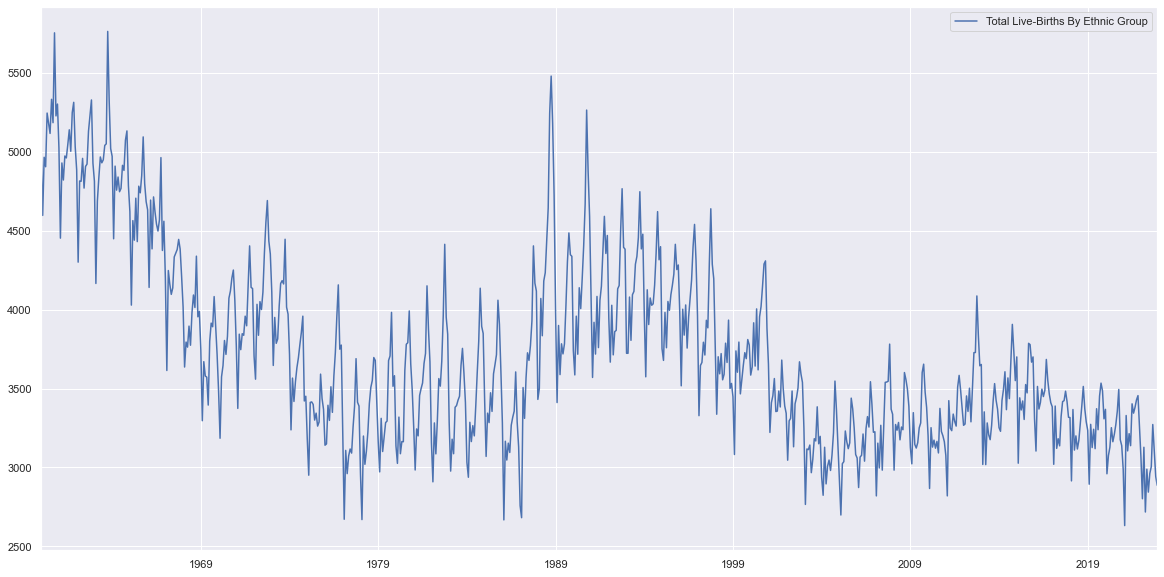

In [858]:
#2022 Dec - 1961 Jan

#remove before 1961 jan
babies = pd.DataFrame(births['Total Live-Births By Ethnic Group'])
#babies = babies[(babies.index > "1960-12")]

babies.head()
babies = babies.astype('int64')
babies.plot(figsize=(20, 10))

<AxesSubplot:>

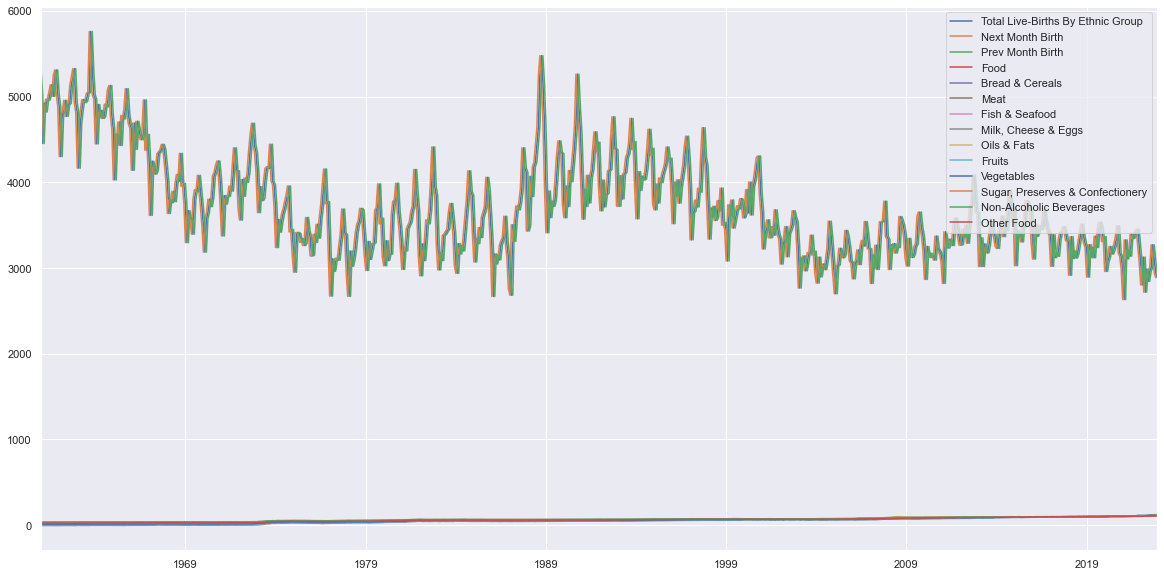

In [859]:
grocerybirths = pd.DataFrame(births['Total Live-Births By Ethnic Group'])
grocerybirths['Next Month Birth'] = grocerybirths['Total Live-Births By Ethnic Group'].shift(-1)
grocerybirths['Prev Month Birth'] = grocerybirths['Total Live-Births By Ethnic Group'].shift(1)


groceryTotal = grocerybirths.join(grocery['Food'], how='inner')
bread = grocerybirths.join(grocery['Bread & Cereals'], how='inner')
meat = grocerybirths.join(grocery['Meat'], how='inner')
fish = grocerybirths.join(grocery['Fish & Seafood'], how='inner')
eggs = grocerybirths.join(grocery['Milk, Cheese & Eggs'], how='inner')
oil = grocerybirths.join(grocery['Oils & Fats'], how='inner')
fruit = grocerybirths.join(grocery['Fruits'], how='inner')
vegetable = grocerybirths.join(grocery['Vegetables'], how='inner')
sugar = grocerybirths.join(grocery['Sugar, Preserves & Confectionery'], how='inner')
alcohol = grocerybirths.join(grocery['Non-Alcoholic Beverages'], how='inner')
others = grocerybirths.join(grocery['Other Food'], how='inner')

groceryMerge = pd.concat([groceryTotal, bread, meat, fish, eggs, oil, fruit, vegetable, sugar, alcohol, others], axis=1, join='inner')
groceryMerge = groceryMerge.loc[:,~groceryMerge.columns.duplicated(keep='first')]

groceryMerge.plot(figsize=(20, 10))

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 744 entries, 1961-01 to 2022-12
Freq: M
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  744 non-null    int64  
 1   Next Month Birth                   743 non-null    float64
 2   Prev Month Birth                   744 non-null    float64
 3   Food                               744 non-null    float64
 4   Bread & Cereals                    744 non-null    float64
 5   Meat                               744 non-null    float64
 6   Fish & Seafood                     744 non-null    float64
 7   Milk, Cheese & Eggs                744 non-null    float64
 8   Oils & Fats                        744 non-null    float64
 9   Fruits                             744 non-null    float64
 10  Vegetables                         744 non-null    float64
 11  Sugar, Preserves & Confectionery   744 

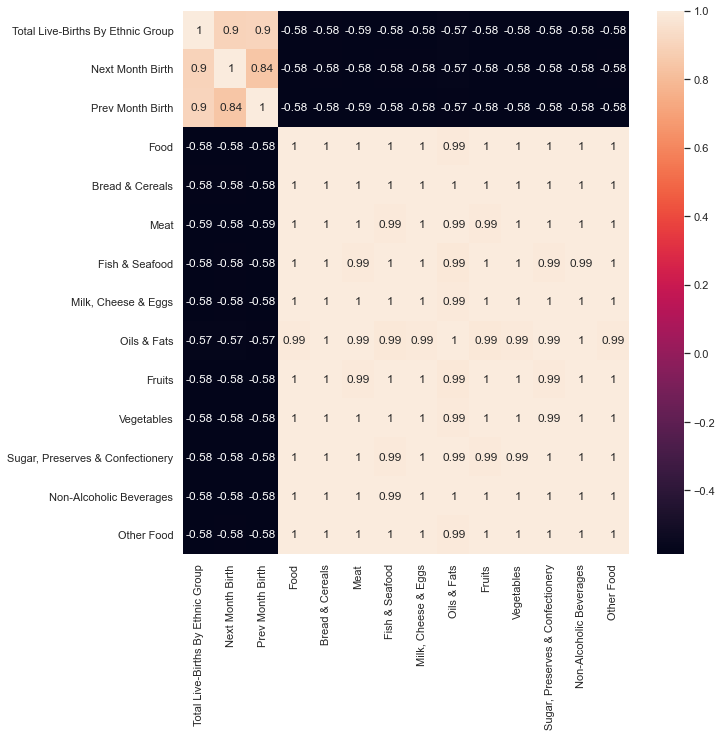

In [860]:
groceryMerge.info()
groceryMerge.corr()

corr_matrix = groceryMerge.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr_matrix, annot=True)
plt.show()

# Random Forest

In [861]:
#results = []
resultsRf = []

for i in range(250):
    seed = random.randint(0, 10000)
    num_folds = 5
    
    # Step 1: Create binary target variable
    groceryMerge['Prediction'] = (groceryMerge['Total Live-Births By Ethnic Group'] > groceryMerge['Next Month Birth']).astype(int)

    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors
    x = groceryMerge[['Total Live-Births By Ethnic Group', 'Prev Month Birth', 'Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables']]
    #x = groceryMerge[['Total Live-Births By Ethnic Group', 'Prev Month Birth', 'Food Excl Food Serving Services', 'Bread & Cereals','Meat','Fish & Seafood','Milk, Cheese & Eggs','Oils & Fats','Fruits','Vegetables','Sugar, Preserves & Confectionery','Non-Alcoholic Beverages','Other Food']]

    # Step 2.2: Response
    y = groceryMerge['Prediction']
    
    # Step 3: Split data into training and test sets
    kResRf = []
    kf = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    # Step 4: Create Random Forest Classifier object
    for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
        # Step 4.1: Split data into training and test sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Step 4.2: Creating Random Forest and Logistic Regression Classifier
        rf = RandomForestClassifier(max_depth=10)
        
        # Step 4.3: Fit model to training data
        rf.fit(x_train, y_train)
        
        # Step 4.4: Make predictions on test data
        y_pred_rf = rf.predict(x_test)
        
        # Step 4.5: Evalute performance
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        precision_rf = precision_score(y_test, y_pred_rf)
        recall_rf = recall_score(y_test, y_pred_rf)
        f1_rf = f1_score(y_test, y_pred_rf)
        
        kResRf.append((fold, accuracy_rf, precision_rf, recall_rf, f1_rf))
    
    #rf = RandomForestClassifier(n_estimators=100, max_depth=5)

    # Step 5: Fit model to training data
    rf.fit(x_train, y_train)

    # Step 6: Make predictions on test data
    acc_mean_rf, acc_std_rf = np.mean([r[1] for r in kResRf]), np.std([r[1] for r in kResRf])
    prec_mean_rf, prec_std_rf = np.mean([r[2] for r in kResRf]), np.std([r[2] for r in kResRf])
    rec_mean_rf, rec_std_rf = np.mean([r[3] for r in kResRf]), np.std([r[3] for r in kResRf])
    f1_mean_rf, f1_std_rf = np.mean([r[4] for r in kResRf]), np.std([r[4] for r in kResRf])
    
    resultsRf.append((seed, acc_mean_rf, acc_std_rf, prec_mean_rf, prec_std_rf, rec_mean_rf, rec_std_rf, f1_mean_rf, f1_std_rf))
    #y_pred = rf.predict(x_test)

    # Step 7: Evaluate performance
    #accuracy = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred)
    #confuse = confusion_matrix(y_test, y_pred)

    #results.append((seed, accuracy, precision, recall, f1, confuse))


# Sort results by F1 score in descending order
#results.sort(key=lambda x: x[4], reverse=True)
resultsRf.sort(key=lambda x: x[7], reverse=True)

In [862]:
resultsLr = []

for i in range(5):
    seed = resultsRf[i][0]
    kResLr = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
        X_train, X_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        lr = LogisticRegression(max_iter=1000, solver='liblinear')
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        
        accuracy_lr = accuracy_score(y_test, y_pred_lr)
        precision_lr = precision_score(y_test, y_pred_lr)
        recall_lr = recall_score(y_test, y_pred_lr)
        f1_lr = f1_score(y_test, y_pred_lr)
        kResLr.append((fold, accuracy_lr, precision_lr, recall_lr, f1_lr))
        
    acc_mean_lr, acc_std_lr = np.mean([r[1] for r in kResLr]), np.std([r[1] for r in kResLr])
    prec_mean_lr, prec_std_lr = np.mean([r[2] for r in kResLr]), np.std([r[2] for r in kResLr])
    rec_mean_lr, rec_std_lr = np.mean([r[3] for r in kResLr]), np.std([r[3] for r in kResLr])
    f1_mean_lr, f1_std_lr = np.mean([r[4] for r in kResLr]), np.std([r[4] for r in kResLr])   
    resultsLr.append((seed, acc_mean_lr, acc_std_lr, prec_mean_lr, prec_std_lr, rec_mean_lr, rec_std_lr, f1_mean_lr, f1_std_lr))

In [863]:
topResultsRf = resultsRf[:5]

for i in range(5):
    print('----------------------------------------------')
    print(f"Random state {topResultsRf[i][0]}:")
    print(f'Accuracy  = {topResultsRf[i][1]:.4f} +/- {topResultsRf[i][2]:.4f}  vs  {resultsLr[i][1]:.4f} +/- {resultsLr[i][2]:.4f}')
    print(f'Precision = {topResultsRf[i][3]:.4f} +/- {topResultsRf[i][4]:.4f}  vs  {resultsLr[i][3]:.4f} +/- {resultsLr[i][4]:.4f}')
    print(f'Recall    = {topResultsRf[i][5]:.4f} +/- {topResultsRf[i][6]:.4f}  vs  {resultsLr[i][5]:.4f} +/- {resultsLr[i][6]:.4f}')
    print(f'F1 score  = {topResultsRf[i][7]:.4f} +/- {topResultsRf[i][8]:.4f}  vs  {resultsLr[i][7]:.4f} +/- {resultsLr[i][8]:.4f}')
print('----------------------------------------------')

----------------------------------------------
Random state 364:
Accuracy  = 0.6466 +/- 0.0382  vs  0.5631 +/- 0.0273
Precision = 0.6347 +/- 0.0603  vs  0.5448 +/- 0.0298
Recall    = 0.6315 +/- 0.0425  vs  0.5151 +/- 0.0612
F1 score  = 0.6307 +/- 0.0326  vs  0.5276 +/- 0.0384
----------------------------------------------
Random state 9007:
Accuracy  = 0.6385 +/- 0.0500  vs  0.5631 +/- 0.0273
Precision = 0.6248 +/- 0.0886  vs  0.5448 +/- 0.0298
Recall    = 0.6266 +/- 0.0472  vs  0.5151 +/- 0.0612
F1 score  = 0.6233 +/- 0.0600  vs  0.5276 +/- 0.0384
----------------------------------------------
Random state 5129:
Accuracy  = 0.6492 +/- 0.0404  vs  0.5631 +/- 0.0273
Precision = 0.6457 +/- 0.0569  vs  0.5448 +/- 0.0298
Recall    = 0.6042 +/- 0.0258  vs  0.5151 +/- 0.0612
F1 score  = 0.6230 +/- 0.0336  vs  0.5276 +/- 0.0384
----------------------------------------------
Random state 3473:
Accuracy  = 0.6532 +/- 0.0440  vs  0.5631 +/- 0.0273
Precision = 0.6580 +/- 0.0779  vs  0.5448 +/- 0.

In [864]:
print(f'Average Accuracy:  {sum([i[1] for i in topResultsRf])/5:.4f}  vs  {sum([i[1] for i in resultsLr])/5:.4f}')
print(f'Average Precision: {sum([i[3] for i in topResultsRf])/5:.4f}  vs  {sum([i[3] for i in resultsLr])/5:.4f}')
print(f'Average Recall:    {sum([i[5] for i in topResultsRf])/5:.4f}  vs  {sum([i[5] for i in resultsLr])/5:.4f}')
print(f'Average F1 Score:  {sum([i[7] for i in topResultsRf])/5:.4f}  vs  {sum([i[7] for i in resultsLr])/5:.4f}')

Average Accuracy:  0.6457  vs  0.5631
Average Precision: 0.6385  vs  0.5448
Average Recall:    0.6163  vs  0.5151
Average F1 Score:  0.6243  vs  0.5276
